```
Group IDs:
[ 29 284 132 269  73 154  86 211 201  94  67 160 260 199   5 163 147   7
 384   2  37  74  31 198 178  17  77 222 164  80 221  57 189  96 327 100
 220  11 128 273 424 360 122  79 194  70 149 412  55 334 104 153 546 140
 459  66 114  28 170 159  63  52 123  84  36 204 380  38 197 351  15  22
 243  54 145  82 113 332  69 193  95 331  44 363 339 150 195  46  48  56
 214]
Galaxy IDs:
[100649 260124 198113 255864 156715 210108 167560 235371 231020 173944
 151743 213185 253080 230192  31188 214555 206437  39950 285062  15157
 113853 157470 104262 229864 222023  72753 160259 239403 214899 162599
 239005 141140 226510 175395 271683 178301 238753  55214 195844 256988
 292937 279868 192299 161761 228456 154001 207512 290424 138546 273409
 180944 209644 313366 202537 299278 150661 187313  98455 217914 212615
 147695 134794 192858 165847 112383 232289 284252 115308 229497 277822
  67538  85932 247466 137374 205383 164234 186722 272884 153404 227973
 174852 272665 123770 280518 274669 208084 228851 126831 129843 139979
 236462]
 ```

Note the unit conversion: the coordinates in the new particle files are in comoving (!) kpc/h, not physical kpc. The center of each particle cube is the center of the galaxy in question (SubhaloPos), they go out to 2 R200c.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py


In [82]:
Group_IDs = [ 29, 284, 132, 269,  73, 154,  86, 211, 201,  94,  67, 160, 260, 199, 5, 163, 147, 7, 384, 2, 37,
             74, 31, 198, 178, 17, 77, 222, 164,  80, 221,  57, 189,  96, 327, 100, 220,  11, 128, 273, 424,
             360, 122,  79, 194,  70, 149, 412,  55, 334, 104, 153, 546, 140, 459,  66, 114, 28, 170, 159, 63,
             52, 123, 84, 36, 204, 380, 38, 197, 351, 15, 22, 243, 54, 145,  82, 113, 332,  69, 193,  95, 331,
             44, 363, 339, 150, 195,  46,  48, 56, 214]

In [83]:
full_particles_file_location = '/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/full_particles/boxptl_tng100_072_profiletest.hdf5'

full_particles_file = h5py.File(full_particles_file_location, 'r')


In [85]:
keys = full_particles_file.keys()[2:]

keys

[u'subbox_000_ptlstr_Coordinates',
 u'subbox_000_ptlstr_Masses',
 u'subbox_001_ptlstr_Coordinates',
 u'subbox_001_ptlstr_Masses',
 u'subbox_002_ptlstr_Coordinates',
 u'subbox_002_ptlstr_Masses',
 u'subbox_003_ptlstr_Coordinates',
 u'subbox_003_ptlstr_Masses',
 u'subbox_004_ptlstr_Coordinates',
 u'subbox_004_ptlstr_Masses',
 u'subbox_005_ptlstr_Coordinates',
 u'subbox_005_ptlstr_Masses',
 u'subbox_006_ptlstr_Coordinates',
 u'subbox_006_ptlstr_Masses',
 u'subbox_007_ptlstr_Coordinates',
 u'subbox_007_ptlstr_Masses',
 u'subbox_008_ptlstr_Coordinates',
 u'subbox_008_ptlstr_Masses',
 u'subbox_009_ptlstr_Coordinates',
 u'subbox_009_ptlstr_Masses',
 u'subbox_010_ptlstr_Coordinates',
 u'subbox_010_ptlstr_Masses',
 u'subbox_011_ptlstr_Coordinates',
 u'subbox_011_ptlstr_Masses',
 u'subbox_012_ptlstr_Coordinates',
 u'subbox_012_ptlstr_Masses',
 u'subbox_013_ptlstr_Coordinates',
 u'subbox_013_ptlstr_Masses',
 u'subbox_014_ptlstr_Coordinates',
 u'subbox_014_ptlstr_Masses',
 u'subbox_015_ptlstr_Coor

In [84]:
len(Group_IDs)

92

In [4]:
z_tng = 0.4
h_tng = 0.704

In [5]:
particle_positions = np.array(f['subbox_000_ptlstr_Coordinates'])
particle_masses = np.array(f['subbox_000_ptlstr_Masses'])

#convert from comoving h-inverse to physical real-h
particle_positions = particle_positions / float(h_tng*(1+z_tng)) 

In [6]:
particle_positions.shape

(1466448, 3)

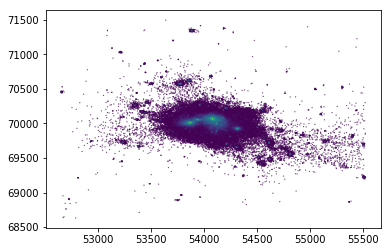

In [7]:
plt.hexbin(particle_positions[:,0], particle_positions[:,1], gridsize=1000, bins = 'log', mincnt=1)
plt.show()

In [35]:
xmin, xmax = min(particle_positions[:,0]), max(particle_positions[:,0]), 
x_length = xmax - xmin
print(x_length)


2871.57179259073


In [36]:
ymin, ymax = min(particle_positions[:,1]), max(particle_positions[:,1]), 
y_length = ymax - ymin
print(y_length)

2862.312639664393


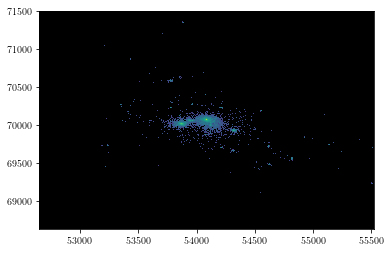

In [37]:
import matplotlib.colors as mcolors
hist, _, _, _ = plt.hist2d(particle_positions[:,0], particle_positions[:,1], weights = particle_masses,
                           bins=[x_length,y_length],norm=mcolors.LogNorm())
plt.show()

(2871, 2862)


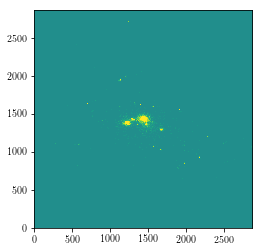

In [38]:
print(hist.shape)
m, s = np.mean(hist), np.std(hist)
plt.imshow(hist.T, interpolation='nearest', cmap=plt.get_cmap('viridis'),
                   vmin=m-s, vmax=m+s, origin='lower')

In [91]:
def measure_profile_from_map(particle_map, gal_n):
    
    maps_location='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/'

    file_name='TNG_'+str(gal_n)+'_xy_full_particles'
    file_path = maps_location + file_name + '.fits'

    save_to_fits(particle_map, file_path)
    data=particle_map

    

    #central pixels
    x0=len(data)/2.
    y0=len(data)/2.

    ###########################################################################
    #ellipse information
    #########################

    #get background
    bkg = sep.Background(data, bw=10, bh=10, fw=5, fh=5)
    bkg_subtracted_data = data - bkg

    # import pdb; pdb.set_trace()

    thresh = 20 * bkg.globalrms
    objects = sep.extract(bkg_subtracted_data, thresh, minarea = 100,
                          deblend_nthresh=24, deblend_cont=0.1)

    #find object closest to image center
    try:
        obj = find_closest(objects, x0=x0, y0=y0)
    except:
        print('NO OBJECTS FOUND AT THIS THRESHOLD')
        return None

    #ellipse parameters
    theta = obj['theta']
    q = obj['b']/ obj['a']

    ###########################################################################
    #1D masses from galSBP
    pixel_scale = 1
    intMode='mean'
    
    iso, iso_bin = galSBP.galSBP(file_path,
                                     galX=x0,
                                     galY=y0,
                                     galQ=q,
                                     galPA=theta* 180. / np.pi,
                                     maxSma=1000,
                                     iniSma=50.0,
                                     stage=3,
                                     intMode=intMode,
                                     ellipStep=0.1,
                                     pix=pixel_scale,
                                     zpPhoto=0.0,
                                     isophote=x_isophote,
                                     xttools=x_ttools,
                                     recenter=True,
                                     savePng=False,
                                     verbose=True,
                                     uppClip=3.0,
                                     lowClip=3.0,
                                     nClip=2)


    ###########################################################################
    if iso:
        iso['sma_kpc'] = iso['sma'] * pixel_scale
        iso['intens_kpc']=iso['intens'] / (pixel_scale**2)

    return iso

In [78]:
hist = np.ascontiguousarray(hist)

full_particles_iso = measure_profile_from_map(hist,0)

----------------------------------------------------------------------------------------------------
###      galX, galY :  1435.5 1435.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_0_xy_full_particles.fits
###      Input Image   : temp_QCXZG.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

(0, u'subbox_000_ptlstr_Coordinates', u'subbox_000_ptlstr_Masses')


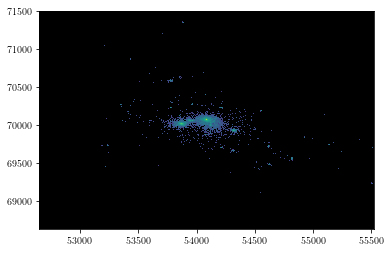

----------------------------------------------------------------------------------------------------
###      galX, galY :  1435.5 1435.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_29_xy_full_particles.fits
###      Input Image   : temp_3I2WQ.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_par

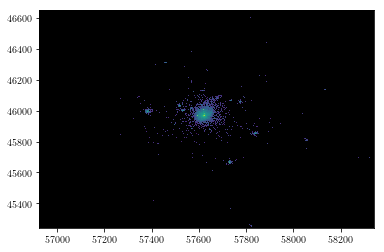

----------------------------------------------------------------------------------------------------
###      galX, galY :  708.0 708.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_284_xy_full_particles.fits
###      Input Image   : temp_EENWM.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

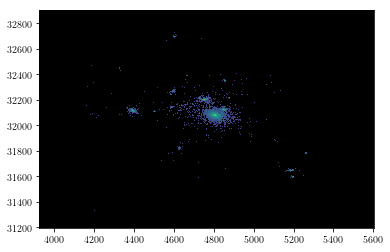

----------------------------------------------------------------------------------------------------
###      galX, galY :  839.0 839.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_132_xy_full_particles.fits
###      Input Image   : temp_4FCQP.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

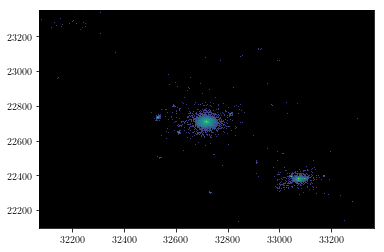

----------------------------------------------------------------------------------------------------
###      galX, galY :  646.0 646.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_269_xy_full_particles.fits
###      Input Image   : temp_J70P3.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

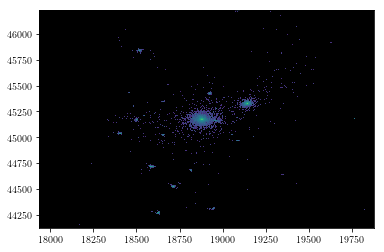

----------------------------------------------------------------------------------------------------
###      galX, galY :  972.0 972.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_73_xy_full_particles.fits
###      Input Image   : temp_QV9BL.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_parti

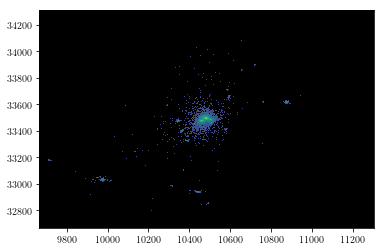

----------------------------------------------------------------------------------------------------
###      galX, galY :  819.0 819.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_154_xy_full_particles.fits
###      Input Image   : temp_30D2R.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

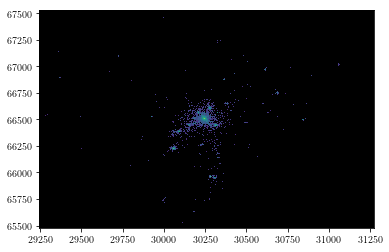

----------------------------------------------------------------------------------------------------
###      galX, galY :  1014.5 1014.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_86_xy_full_particles.fits
###      Input Image   : temp_N8V2F.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_par

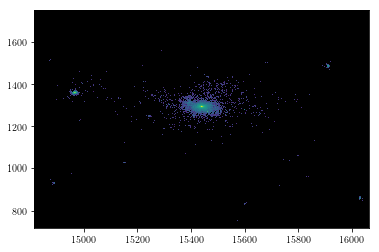

----------------------------------------------------------------------------------------------------
###      galX, galY :  625.0 625.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_211_xy_full_particles.fits
###      Input Image   : temp_99KO1.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

/Users/fardila/Documents/Github/kungpao/kungpao/galsbp/galSBP.py:577: RuntimeWarning: divide by zero encountered in log10
  sbpOri = zp - 2.5 * np.log10(intensOri / (pixArea * exptime))
/Users/fardila/Documents/Github/kungpao/kungpao/galsbp/galSBP.py:578: RuntimeWarning: divide by zero encountered in log10
  sbpSub = zp - 2.5 * np.log10(intensSub / (pixArea * exptime))


----------------------------------------------------------------------------------------------------
###     Input background value   :  0.0
###     1-D SBP background value :  2660.3244999999997
###     Current outer background :  2660.3244999999997
----------------------------------------------------------------------------------------------------
(8, u'subbox_008_ptlstr_Coordinates', u'subbox_008_ptlstr_Masses')


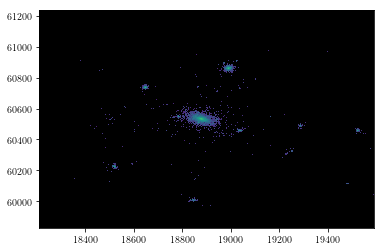

----------------------------------------------------------------------------------------------------
###      galX, galY :  690.0 690.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_201_xy_full_particles.fits
###      Input Image   : temp_2PNWQ.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

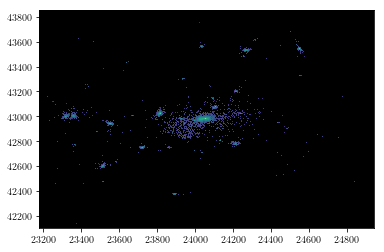

----------------------------------------------------------------------------------------------------
###      galX, galY :  882.0 882.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_94_xy_full_particles.fits
###      Input Image   : temp_B9G81.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_parti

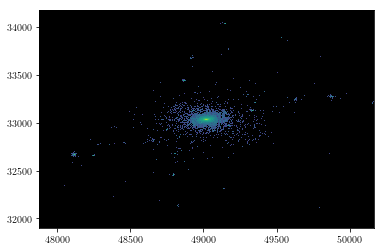

----------------------------------------------------------------------------------------------------
###      galX, galY :  1143.0 1143.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_67_xy_full_particles.fits
###      Input Image   : temp_ELIF9.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_par

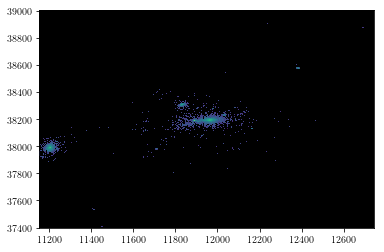

----------------------------------------------------------------------------------------------------
###      galX, galY :  796.5 796.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_160_xy_full_particles.fits
###      Input Image   : temp_IAR2Z.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

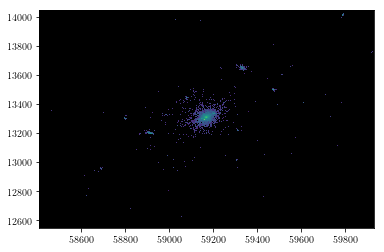

----------------------------------------------------------------------------------------------------
###      galX, galY :  760.0 760.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_260_xy_full_particles.fits
###      Input Image   : temp_PWYP7.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

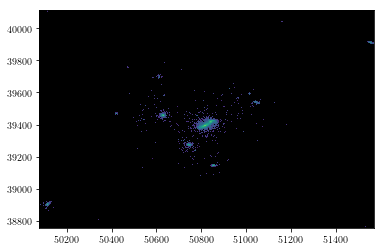

----------------------------------------------------------------------------------------------------
###      galX, galY :  747.5 747.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_199_xy_full_particles.fits
###      Input Image   : temp_A3GRX.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

/Users/fardila/Documents/Github/kungpao/kungpao/galsbp/galSBP.py:588: RuntimeWarning: divide by zero encountered in log10
  (pixArea * exptime))
/Users/fardila/Documents/Github/kungpao/kungpao/galsbp/galSBP.py:589: RuntimeWarning: invalid value encountered in subtract
  sbp_err = (sbpSub - sbp_low)


----------------------------------------------------------------------------------------------------
###     Input background value   :  0.0
###     1-D SBP background value :  47059.67
###     Current outer background :  47059.67
----------------------------------------------------------------------------------------------------
(14, u'subbox_014_ptlstr_Coordinates', u'subbox_014_ptlstr_Masses')


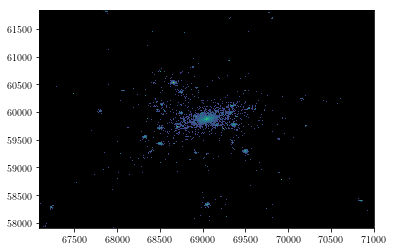

----------------------------------------------------------------------------------------------------
###      galX, galY :  1955.5 1955.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_5_xy_full_particles.fits
###      Input Image   : temp_VJAQW.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

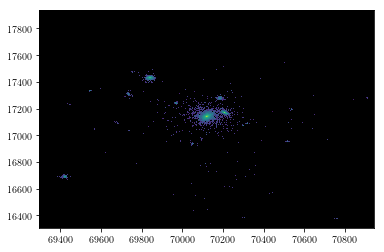

----------------------------------------------------------------------------------------------------
###      galX, galY :  824.0 824.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_163_xy_full_particles.fits
###      Input Image   : temp_KRT89.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

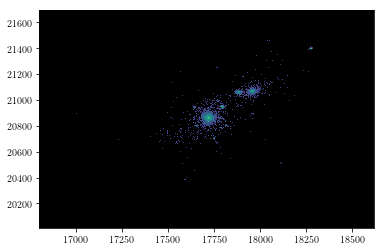

----------------------------------------------------------------------------------------------------
###      galX, galY :  909.0 909.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_147_xy_full_particles.fits
###      Input Image   : temp_B9NJ5.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

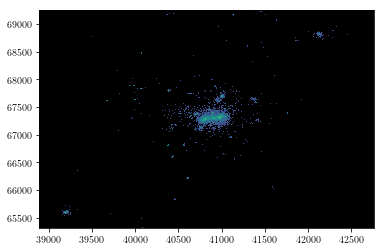

----------------------------------------------------------------------------------------------------
###      galX, galY :  1935.0 1935.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_7_xy_full_particles.fits
###      Input Image   : temp_CWYS8.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

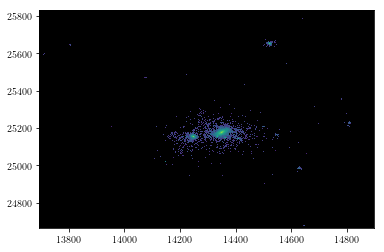

----------------------------------------------------------------------------------------------------
###      galX, galY :  602.0 602.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_384_xy_full_particles.fits
###      Input Image   : temp_PFBUO.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

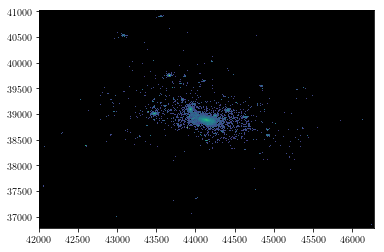

----------------------------------------------------------------------------------------------------
###      galX, galY :  2134.5 2134.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_2_xy_full_particles.fits
###      Input Image   : temp_ZGH2J.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

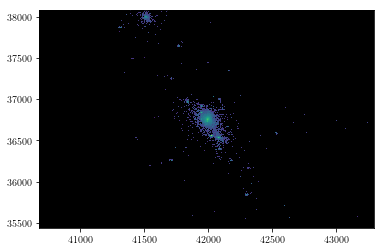

----------------------------------------------------------------------------------------------------
###      galX, galY :  1308.5 1308.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_37_xy_full_particles.fits
###      Input Image   : temp_RDIT4.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_par

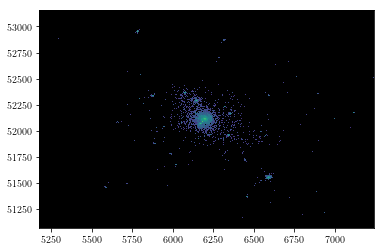

----------------------------------------------------------------------------------------------------
###      galX, galY :  1034.0 1034.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_74_xy_full_particles.fits
###      Input Image   : temp_VKVFE.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_par

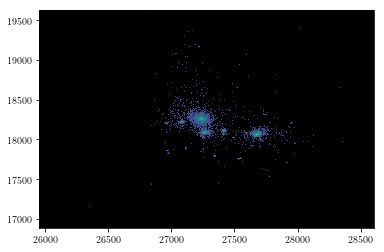

----------------------------------------------------------------------------------------------------
###      galX, galY :  1326.0 1326.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_31_xy_full_particles.fits
###      Input Image   : temp_OX6V4.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_par

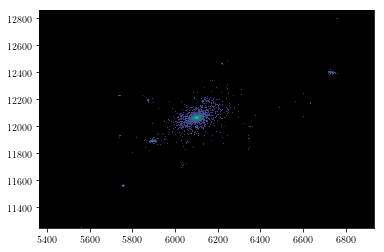

----------------------------------------------------------------------------------------------------
###      galX, galY :  785.0 785.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_198_xy_full_particles.fits
###      Input Image   : temp_TN9P2.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

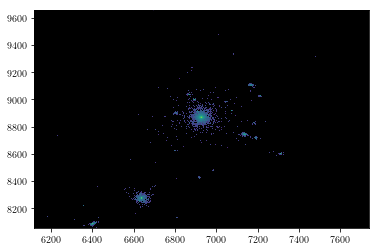

----------------------------------------------------------------------------------------------------
###      galX, galY :  810.5 810.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_178_xy_full_particles.fits
###      Input Image   : temp_UAZP5.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

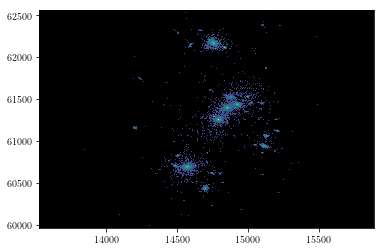

----------------------------------------------------------------------------------------------------
###      galX, galY :  1180.5 1180.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_17_xy_full_particles.fits
###      Input Image   : temp_N8GRN.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_par

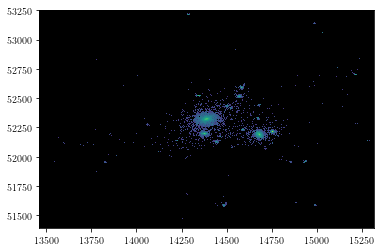

----------------------------------------------------------------------------------------------------
###      galX, galY :  928.5 928.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_77_xy_full_particles.fits
###      Input Image   : temp_A02QS.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_parti

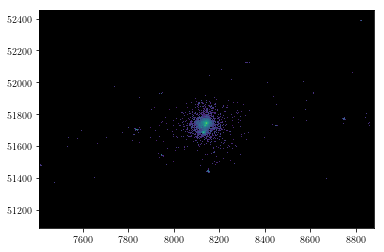

----------------------------------------------------------------------------------------------------
###      galX, galY :  736.0 736.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_222_xy_full_particles.fits
###      Input Image   : temp_3CQJP.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

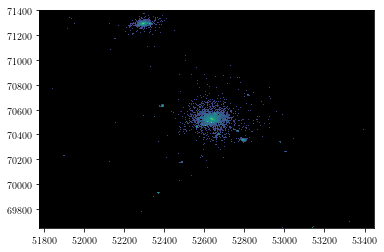

----------------------------------------------------------------------------------------------------
###      galX, galY :  836.0 836.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_164_xy_full_particles.fits
###      Input Image   : temp_O3MVD.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

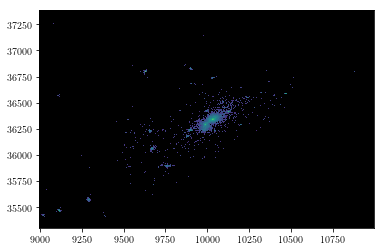

----------------------------------------------------------------------------------------------------
###      galX, galY :  1000.0 1000.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_80_xy_full_particles.fits
###      Input Image   : temp_1QIJE.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_par

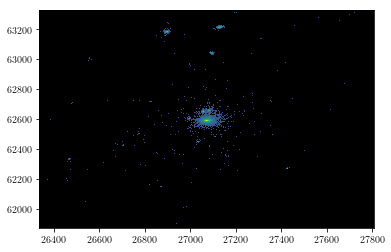

----------------------------------------------------------------------------------------------------
###      galX, galY :  736.0 736.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_221_xy_full_particles.fits
###      Input Image   : temp_0BWUE.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

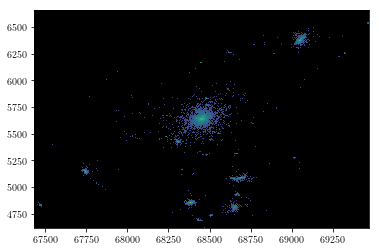

----------------------------------------------------------------------------------------------------
###      galX, galY :  1020.0 1020.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_57_xy_full_particles.fits
###      Input Image   : temp_OG8ID.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_par

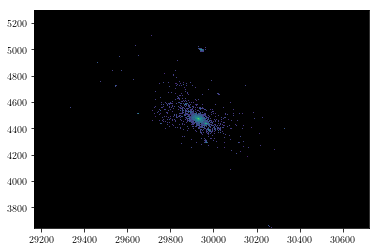

----------------------------------------------------------------------------------------------------
###      galX, galY :  777.0 777.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_189_xy_full_particles.fits
###      Input Image   : temp_J7SWA.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

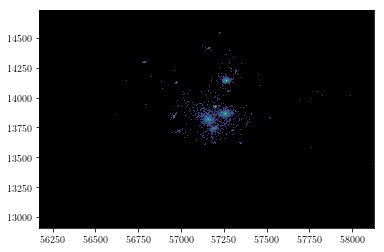

----------------------------------------------------------------------------------------------------
###      galX, galY :  977.0 977.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_96_xy_full_particles.fits
###      Input Image   : temp_D0UFU.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_parti

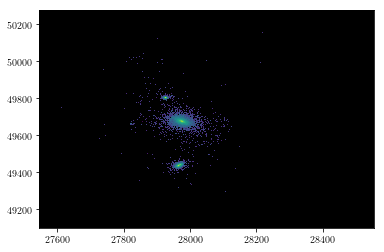

----------------------------------------------------------------------------------------------------
###      galX, galY :  503.5 503.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_327_xy_full_particles.fits
###      Input Image   : temp_J8M60.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

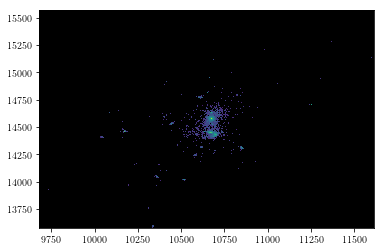

----------------------------------------------------------------------------------------------------
###      galX, galY :  967.0 967.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_100_xy_full_particles.fits
###      Input Image   : temp_ECDA8.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

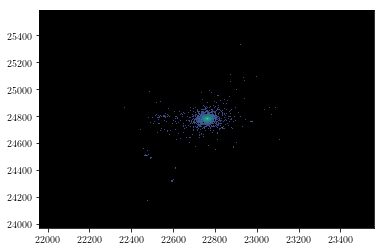

----------------------------------------------------------------------------------------------------
###      galX, galY :  800.5 800.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_220_xy_full_particles.fits
###      Input Image   : temp_MNKCZ.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

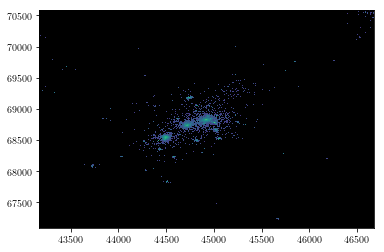

----------------------------------------------------------------------------------------------------
###      galX, galY :  1754.0 1754.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_11_xy_full_particles.fits
###      Input Image   : temp_55ZIF.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_par

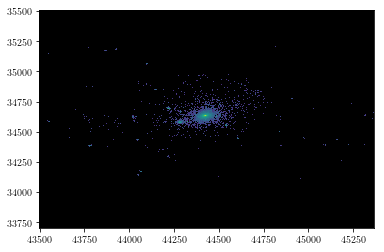

----------------------------------------------------------------------------------------------------
###      galX, galY :  934.5 934.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_128_xy_full_particles.fits
###      Input Image   : temp_LVL8K.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

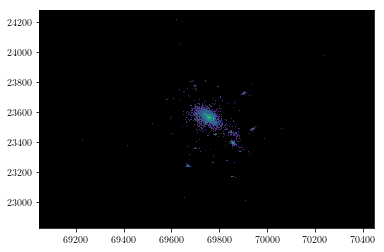

----------------------------------------------------------------------------------------------------
###      galX, galY :  699.5 699.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_273_xy_full_particles.fits
###      Input Image   : temp_FAYXF.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

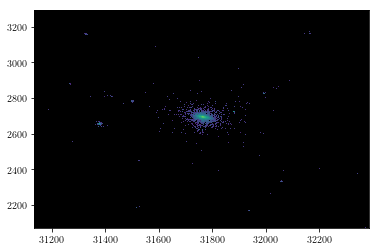

----------------------------------------------------------------------------------------------------
###      galX, galY :  625.5 625.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_424_xy_full_particles.fits
###      Input Image   : temp_ZKOFC.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

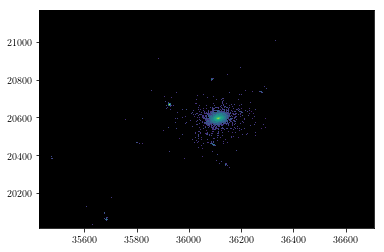

----------------------------------------------------------------------------------------------------
###      galX, galY :  641.0 641.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_360_xy_full_particles.fits
###      Input Image   : temp_9TW2G.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

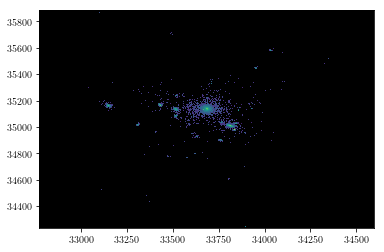

----------------------------------------------------------------------------------------------------
###      galX, galY :  911.5 911.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_122_xy_full_particles.fits
###      Input Image   : temp_TPS2C.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

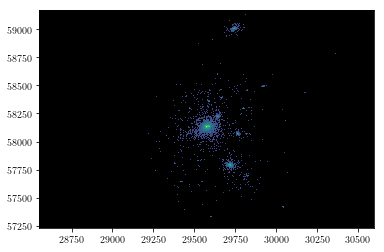

----------------------------------------------------------------------------------------------------
###      galX, galY :  1023.0 1023.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_79_xy_full_particles.fits
###      Input Image   : temp_CBAWM.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_par

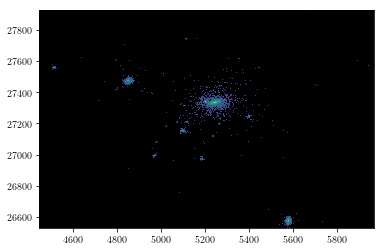

----------------------------------------------------------------------------------------------------
###      galX, galY :  759.0 759.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_194_xy_full_particles.fits
###      Input Image   : temp_5PJ99.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

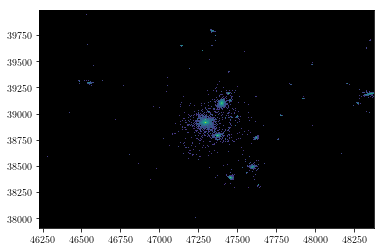

----------------------------------------------------------------------------------------------------
###      galX, galY :  1073.0 1073.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_70_xy_full_particles.fits
###      Input Image   : temp_L5IHB.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_par

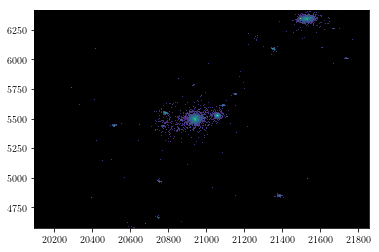

----------------------------------------------------------------------------------------------------
###      galX, galY :  880.5 880.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_149_xy_full_particles.fits
###      Input Image   : temp_AE2RJ.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

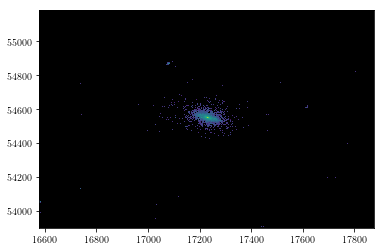

----------------------------------------------------------------------------------------------------
###      galX, galY :  649.0 649.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_412_xy_full_particles.fits
###      Input Image   : temp_142O8.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

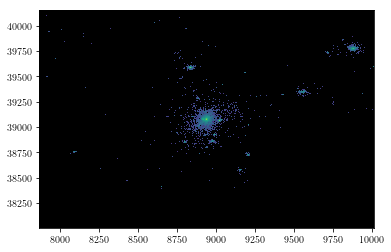

----------------------------------------------------------------------------------------------------
###      galX, galY :  1074.5 1074.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_55_xy_full_particles.fits
###      Input Image   : temp_P78JB.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_par

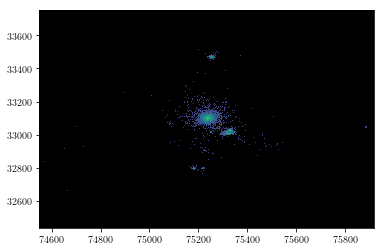

----------------------------------------------------------------------------------------------------
###      galX, galY :  683.5 683.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_334_xy_full_particles.fits
###      Input Image   : temp_9SEJD.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

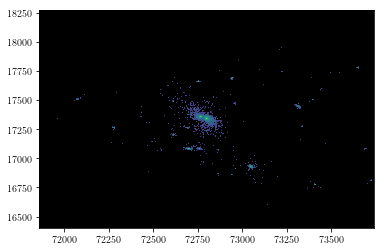

----------------------------------------------------------------------------------------------------
###      galX, galY :  939.5 939.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_104_xy_full_particles.fits
###      Input Image   : temp_XQQJ9.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

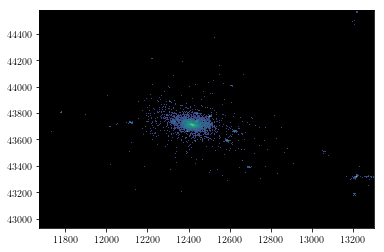

----------------------------------------------------------------------------------------------------
###      galX, galY :  815.5 815.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_153_xy_full_particles.fits
###      Input Image   : temp_IJKW9.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

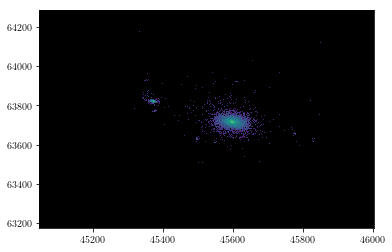

----------------------------------------------------------------------------------------------------
###      galX, galY :  478.0 478.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_546_xy_full_particles.fits
###      Input Image   : temp_TIR9G.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

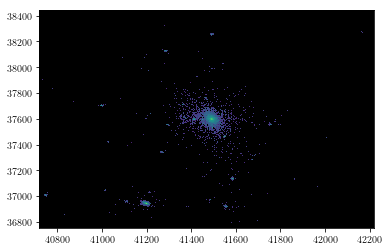

----------------------------------------------------------------------------------------------------
###      galX, galY :  750.5 750.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_140_xy_full_particles.fits
###      Input Image   : temp_L43DV.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

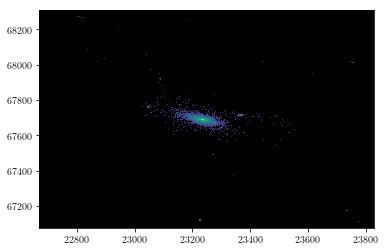

----------------------------------------------------------------------------------------------------
###      galX, galY :  579.5 579.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_459_xy_full_particles.fits
###      Input Image   : temp_ICLIP.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

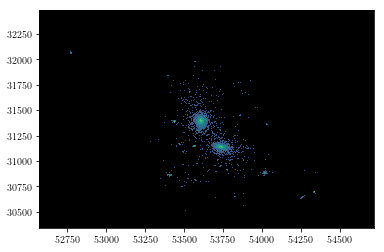

----------------------------------------------------------------------------------------------------
###      galX, galY :  1074.5 1074.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_66_xy_full_particles.fits
###      Input Image   : temp_I8515.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_par

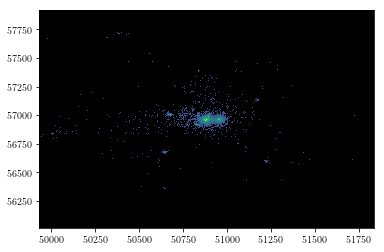

----------------------------------------------------------------------------------------------------
###      galX, galY :  953.0 953.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_114_xy_full_particles.fits
###      Input Image   : temp_CN9AR.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

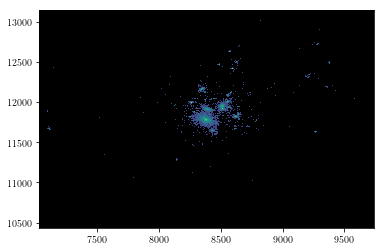

----------------------------------------------------------------------------------------------------
###      galX, galY :  1355.0 1355.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_28_xy_full_particles.fits
###      Input Image   : temp_5CB9L.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_par

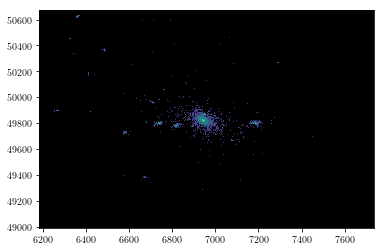

----------------------------------------------------------------------------------------------------
###      galX, galY :  775.5 775.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_170_xy_full_particles.fits
###      Input Image   : temp_ZDHUW.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

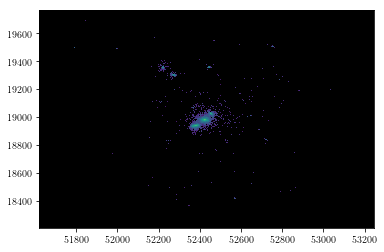

----------------------------------------------------------------------------------------------------
###      galX, galY :  812.0 812.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_159_xy_full_particles.fits
###      Input Image   : temp_4XM2J.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

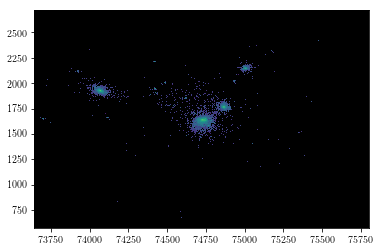

----------------------------------------------------------------------------------------------------
###      galX, galY :  1080.5 1080.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_63_xy_full_particles.fits
###      Input Image   : temp_5GDL3.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_par

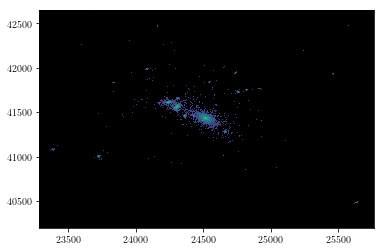

----------------------------------------------------------------------------------------------------
###      galX, galY :  1238.5 1238.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_52_xy_full_particles.fits
###      Input Image   : temp_GH3OE.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_par

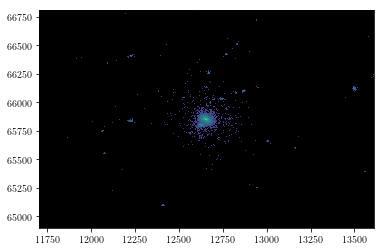

----------------------------------------------------------------------------------------------------
###      galX, galY :  953.0 953.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_123_xy_full_particles.fits
###      Input Image   : temp_QB09P.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

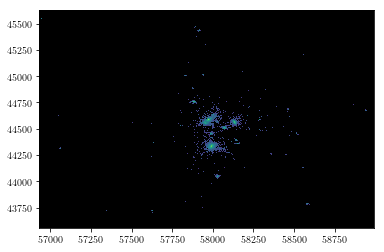

----------------------------------------------------------------------------------------------------
###      galX, galY :  1029.5 1029.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_84_xy_full_particles.fits
###      Input Image   : temp_ST6E1.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_par

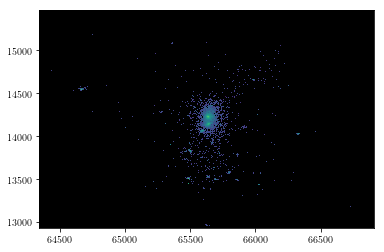

----------------------------------------------------------------------------------------------------
###      galX, galY :  1283.0 1283.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_36_xy_full_particles.fits
###      Input Image   : temp_4YXRV.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_par

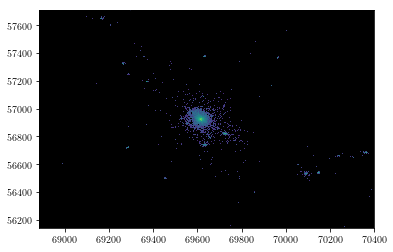

----------------------------------------------------------------------------------------------------
###      galX, galY :  756.5 756.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_204_xy_full_particles.fits
###      Input Image   : temp_QLBBU.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

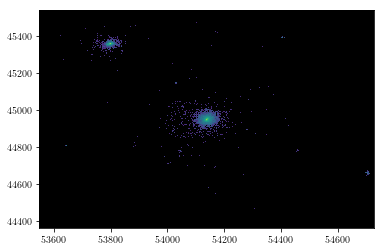

----------------------------------------------------------------------------------------------------
###      galX, galY :  589.5 589.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_380_xy_full_particles.fits
###      Input Image   : temp_R2V3F.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

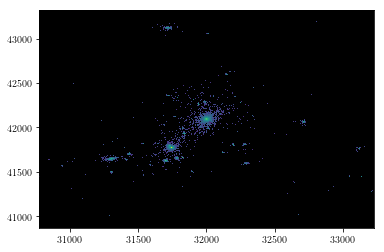

----------------------------------------------------------------------------------------------------
###      galX, galY :  1226.5 1226.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_38_xy_full_particles.fits
###      Input Image   : temp_0LF1B.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_par

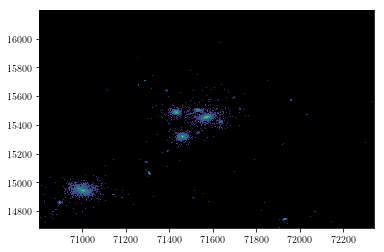

----------------------------------------------------------------------------------------------------
###      galX, galY :  768.5 768.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_197_xy_full_particles.fits
###      Input Image   : temp_NE6HA.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

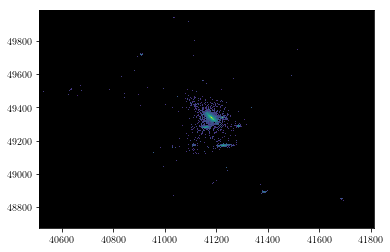

----------------------------------------------------------------------------------------------------
###      galX, galY :  650.0 650.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_351_xy_full_particles.fits
###      Input Image   : temp_BO1NA.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

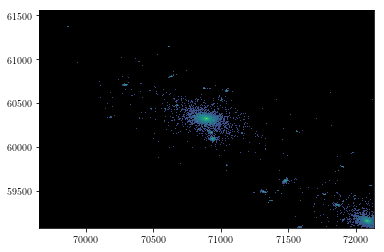

----------------------------------------------------------------------------------------------------
###      galX, galY :  1240.5 1240.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_15_xy_full_particles.fits
###      Input Image   : temp_SQZKV.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_par

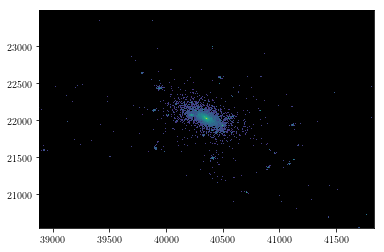

----------------------------------------------------------------------------------------------------
###      galX, galY :  1477.0 1477.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_22_xy_full_particles.fits
###      Input Image   : temp_4XR0S.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_par

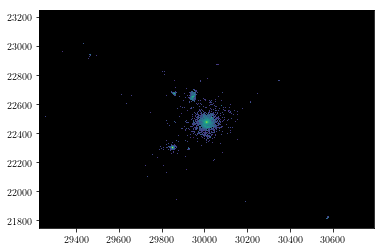

----------------------------------------------------------------------------------------------------
###      galX, galY :  782.5 782.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_243_xy_full_particles.fits
###      Input Image   : temp_3KSNG.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

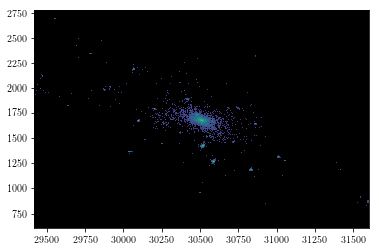

----------------------------------------------------------------------------------------------------
###      galX, galY :  1093.0 1093.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_54_xy_full_particles.fits
###      Input Image   : temp_HDL34.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_par

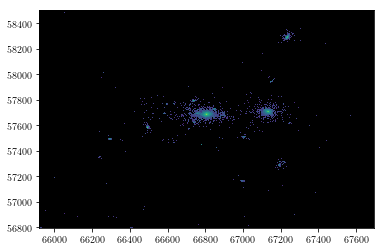

----------------------------------------------------------------------------------------------------
###      galX, galY :  888.0 888.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_145_xy_full_particles.fits
###      Input Image   : temp_OBEE6.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

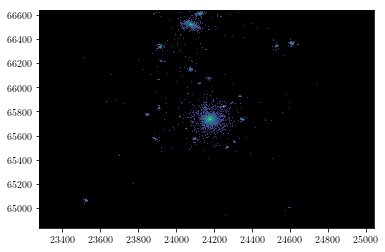

----------------------------------------------------------------------------------------------------
###      galX, galY :  882.5 882.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_82_xy_full_particles.fits
###      Input Image   : temp_CB2TT.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_parti

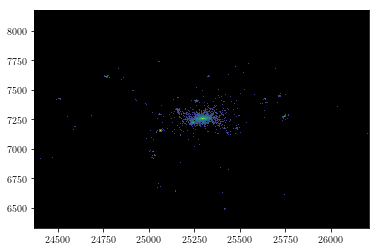

----------------------------------------------------------------------------------------------------
###      galX, galY :  920.0 920.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_113_xy_full_particles.fits
###      Input Image   : temp_A0675.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

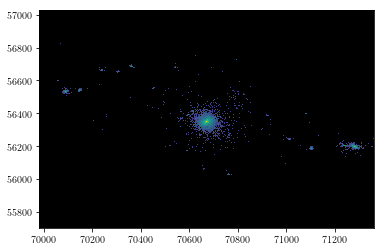

----------------------------------------------------------------------------------------------------
###      galX, galY :  690.5 690.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_332_xy_full_particles.fits
###      Input Image   : temp_NSLSP.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

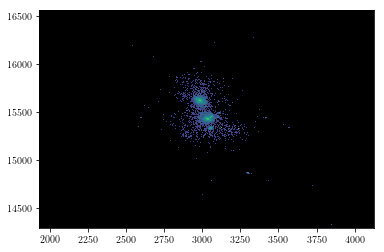

----------------------------------------------------------------------------------------------------
###      galX, galY :  1096.5 1096.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_69_xy_full_particles.fits
###      Input Image   : temp_4TFJB.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_par

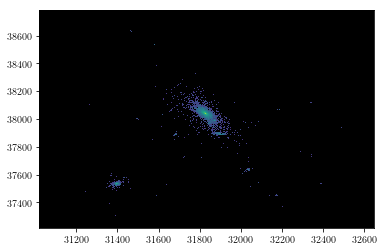

----------------------------------------------------------------------------------------------------
###      galX, galY :  813.5 813.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_193_xy_full_particles.fits
###      Input Image   : temp_2R8JE.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

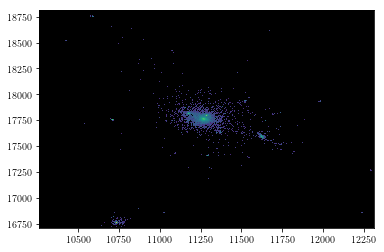

----------------------------------------------------------------------------------------------------
###      galX, galY :  1025.5 1025.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_95_xy_full_particles.fits
###      Input Image   : temp_LD13G.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_par

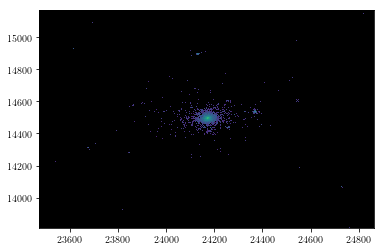

----------------------------------------------------------------------------------------------------
###      galX, galY :  694.5 694.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_331_xy_full_particles.fits
###      Input Image   : temp_QPBR3.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

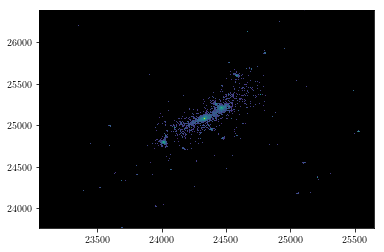

----------------------------------------------------------------------------------------------------
###      galX, galY :  1300.0 1300.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_44_xy_full_particles.fits
###      Input Image   : temp_YG8AD.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_par

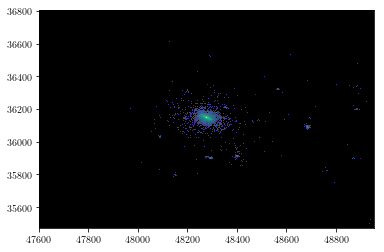

----------------------------------------------------------------------------------------------------
###      galX, galY :  676.0 676.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_363_xy_full_particles.fits
###      Input Image   : temp_IOB1V.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

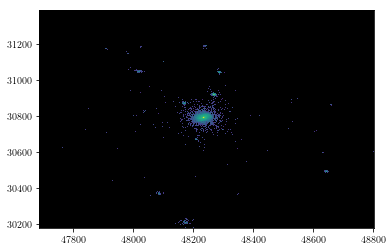

----------------------------------------------------------------------------------------------------
###      galX, galY :  558.0 558.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_339_xy_full_particles.fits
###      Input Image   : temp_6BQE0.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

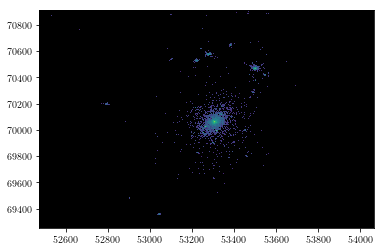

----------------------------------------------------------------------------------------------------
###      galX, galY :  795.0 795.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_150_xy_full_particles.fits
###      Input Image   : temp_VLHNK.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

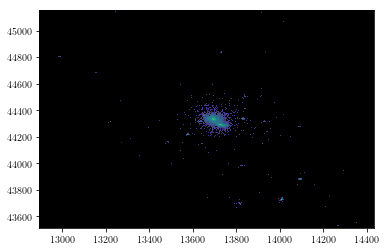

----------------------------------------------------------------------------------------------------
###      galX, galY :  769.5 769.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_195_xy_full_particles.fits
###      Input Image   : temp_E1V27.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

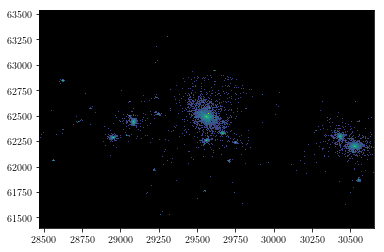

----------------------------------------------------------------------------------------------------
###      galX, galY :  1092.5 1092.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_46_xy_full_particles.fits
###      Input Image   : temp_R140V.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_par

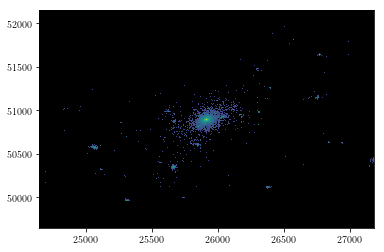

----------------------------------------------------------------------------------------------------
###      galX, galY :  1268.0 1268.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_4_xy_full_particles.fits
###      Input Image   : temp_5KTNM.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

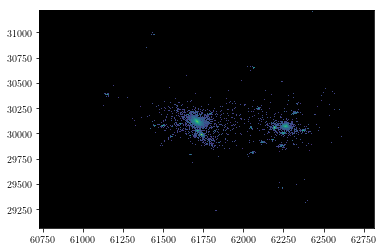

----------------------------------------------------------------------------------------------------
###      galX, galY :  1042.5 1042.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_8_xy_full_particles.fits
###      Input Image   : temp_4SK7E.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_part

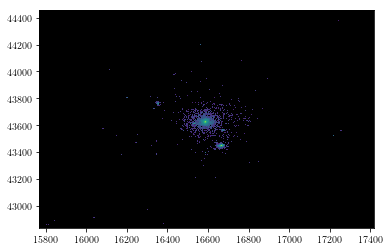

----------------------------------------------------------------------------------------------------
###      galX, galY :  824.5 824.5
###      galR :  20.0
###      iniSma, maxSma :  50.0 1000
###      Stage :  3
###      Step :  0.1
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_particles/TNG_56_xy_full_particles.fits
###      Input Image   : temp_LRBF9.fits
###      Output Binary : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/full_parti

In [92]:
full_particles_isos = []


for i, Group_ID in enumerate(Group_IDs[:-1]): #one more group id in list than HDF5 file
    
    positions_key = keys[2*i]
    masses_key = keys[(2*i)+1]
    
    print(i, positions_key, masses_key)
    
    particle_positions = np.array(full_particles_file[positions_key])
    particle_masses = np.array(full_particles_file[masses_key])

    #convert from comoving h-inverse to physical real-h
    particle_positions = particle_positions / float(h_tng*(1+z_tng)) 
    
    
    xmin, xmax = min(particle_positions[:,0]), max(particle_positions[:,0]), 
    x_length = xmax - xmin
    
    ymin, ymax = min(particle_positions[:,1]), max(particle_positions[:,1]), 
    y_length = ymax - ymin
    
    hist, _, _, _ = plt.hist2d(particle_positions[:,0], particle_positions[:,1], weights = particle_masses,
                           bins=[x_length,y_length],norm=mcolors.LogNorm())
    
    plt.show()
    
    hist = np.ascontiguousarray(hist)

    full_particles_iso = measure_profile_from_map(hist,Group_ID)
    full_particles_isos.append(full_particles_iso)

In [97]:
np.sum([ iso == None for iso in full_particles_isos])
#over half failed ... not sure why

57

# FOF particles

In [144]:
FOF_particles_file_location = '/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/galaxies_stellarmaps_tng75_11.2.hdf5'
f = h5py.File(FOF_particles_file_location, 'r')
FOF_galaxy_IDS = f['catgrp_id'].value
M200 = np.array(f['catgrp_Group_M_Crit200']) # in solar masses
f.close()

In [116]:
FOF_galaxy_IDS

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  86,  88,  89,  90,  92,  93,  94,
        95,  96,  97,  99, 100, 101, 103, 104, 105, 106, 107, 108, 109,
       111, 112, 113, 114, 115, 116, 119, 120, 122, 123, 124, 125, 126,
       127, 128, 130, 131, 132, 133, 137, 138, 139, 140, 142, 143, 144,
       145, 147, 149, 150, 151, 152, 153, 154, 156, 159, 160, 161, 162,
       163, 164, 167, 170, 172, 173, 175, 176, 178, 180, 183, 184, 186,
       187, 189, 191, 192, 193, 194, 195, 197, 198, 199, 201, 204, 208,
       211, 213, 214, 215, 217, 218, 219, 220, 221, 222, 224, 23

In [13]:
f.keys()

[u'catgrp_GroupNsubs',
 u'catgrp_Group_M_Crit200',
 u'catgrp_id',
 u'catgrp_is_primary',
 u'catsh_SubhaloBHMdot',
 u'catsh_SubhaloCM',
 u'catsh_SubhaloGasMetallicity',
 u'catsh_SubhaloGrNr',
 u'catsh_SubhaloHalfmassRadType',
 u'catsh_SubhaloMassInHalfRadType',
 u'catsh_SubhaloMassInRadType',
 u'catsh_SubhaloMassType',
 u'catsh_SubhaloPos',
 u'catsh_SubhaloSFR',
 u'catsh_SubhaloSpin',
 u'catsh_SubhaloStellarPhotometrics',
 u'catsh_SubhaloVel',
 u'catsh_SubhaloVmax',
 u'catsh_id',
 u'config',
 u'map_r_max',
 u'map_star_rho_exsitu_nptl',
 u'map_star_rho_exsitu_xy',
 u'map_star_rho_exsitu_xz',
 u'map_star_rho_exsitu_yz',
 u'map_star_rho_fuzz_exsitu_nptl',
 u'map_star_rho_fuzz_exsitu_xy',
 u'map_star_rho_fuzz_exsitu_xz',
 u'map_star_rho_fuzz_exsitu_yz',
 u'map_star_rho_fuzz_insitu_nptl',
 u'map_star_rho_fuzz_insitu_xy',
 u'map_star_rho_fuzz_insitu_xz',
 u'map_star_rho_fuzz_insitu_yz',
 u'map_star_rho_insitu_nptl',
 u'map_star_rho_insitu_xy',
 u'map_star_rho_insitu_xz',
 u'map_star_rho_insit

In [14]:
import sys
sys.path.append('/Users/fardila/Documents/GitHub/HSC_vs_hydro/')
from functions import *

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


      +------------------------------------------------------------+
      |             Space Telescope Tables Package                 |
      |                  TABLES Version 3.18.3                     |
      |                                                            |
      |   Space Telescope Science Institute, Baltimore, Maryland   |
      |   Copyright (C) 2014 Association of Universities for       |
      |            Research in Astronomy, Inc.(AURA)               |
      |       See stsdas$copyright.stsdas for terms of use.        |
      |         For help, send e-mail to help@stsci.edu            |
      +------------------------------------------------------------+
tables/:
 fitsio/        tbplot/         tobsolete/      ttools/


      +------------------------------------------------------------+
      |       Space Telescope Science Data Analysis System         |


In [159]:
img_cen, img_cen_sat, img_cen_icl, pixel_scale, m_cat = get_mass_maps(FOF_particles_file_location, gal_n=28)

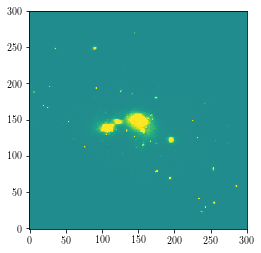

In [162]:
m, s = np.mean(img_cen_icl), np.std(img_cen_icl)
plt.imshow(img_cen_icl.T - img_cen.T + img_cen_sat.T, interpolation='nearest', cmap=plt.get_cmap('viridis'),
                   vmin=m-s, vmax=m+s, origin='lower')

In [60]:
img_cen.shape

(300, 300)

In [153]:
def get_median_profile(isos, pixel_scale, r_bins, quantity = 'intens', R200=None):
    """Get the median profiles."""
    
    if quantity == 'intens':
        mu = np.nanmedian(np.stack([interp1d((gal['sma'] * pixel_scale) ** 0.25, 
                                               np.log10(gal[quantity] / (pixel_scale ** 2)),
                                               bounds_error=False, 
                                               fill_value=np.nan, 
                                               kind='slinear')(r_bins) 
                               for gal in isos]), axis=0)
    if quantity == 'intens_kpc':
        if R200 is not None:
            mu = np.nanmedian(np.stack([interp1d(np.log10(gal['sma_kpc']/r200), 
                                                   np.log10(gal[quantity]),
                                                   bounds_error=False, 
                                                   fill_value=np.nan, 
                                                   kind='slinear')(r_bins) 
                                   for gal,r200 in zip(isos,R200)]), axis=0)   
        else:    
            mu = np.nanmedian(np.stack([interp1d((gal['sma_kpc']) ** 0.25, 
                                                   np.log10(gal[quantity]),
                                                   bounds_error=False, 
                                                   fill_value=np.nan, 
                                                   kind='slinear')(r_bins) 
                                   for gal in isos]), axis=0)
    elif quantity == 'growth_ori':
        mu = np.nanmedian(np.stack([interp1d((gal['sma_kpc']) ** 0.25, 
                                               np.log10(gal[quantity]),
                                               bounds_error=False, 
                                               fill_value=np.nan, 
                                               kind='slinear')(r_bins) 
                               for gal in isos]), axis=0)
        
#     elif quantity == 'hsc':
#         mu = np.nanmedian(np.stack([interp1d(SMA_COMMON, 
#                                                gal,
#                                                bounds_error=False, 
#                                                fill_value=np.nan, 
#                                                kind='slinear')(r_bins) 
#                                for gal in isos]), axis=0)


    return mu

In [79]:
def open_pkl(file_name):
    pkl = open(file_name,'rb')
    array = pickle.load(pkl)
    pkl.close()  
    return array

#open pickels
tng_isos_file='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/tng_isos_merged.pkl'
tng_FOF_isos = open_pkl(tng_isos_file)


In [131]:
full_particles_isos

[<Table length=81>
    sma       intens      int_err   ...  sma_kpc   intens_kpc 
  float64    float64      float64   ...  float64    float64   
 --------- ------------ ----------- ... --------- ------------
       0.0 9186274000.0         nan ...       0.0 9186274000.0
 0.5153717 7571795000.0 263363024.0 ... 0.5153717 7571795000.0
 0.5669089 7407048000.0 287124384.0 ... 0.5669089 7407048000.0
 0.6235998 7225448000.0 312859328.0 ... 0.6235998 7225448000.0
 0.6859598 7024603000.0 340764480.0 ... 0.6859598 7024603000.0
 0.7545558 6802779000.0 371097568.0 ... 0.7545558 6802779000.0
 0.8300114 6557727000.0 404126176.0 ... 0.8300114 6557727000.0
 0.9130126 6286610000.0 440310656.0 ... 0.9130126 6286610000.0
  1.004314 5986723000.0 480061344.0 ...  1.004314 5986723000.0
  1.104745 5664706000.0 519021248.0 ...  1.104745 5664706000.0
       ...          ...         ... ...       ...          ...
   407.014     67803.34    10072.36 ...   407.014     67803.34
  447.7154     35040.32    3766.295 

In [134]:
full_particles_isos = [iso for iso in full_particles_isos if iso is not None]

/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: divide by zero encountered in log10


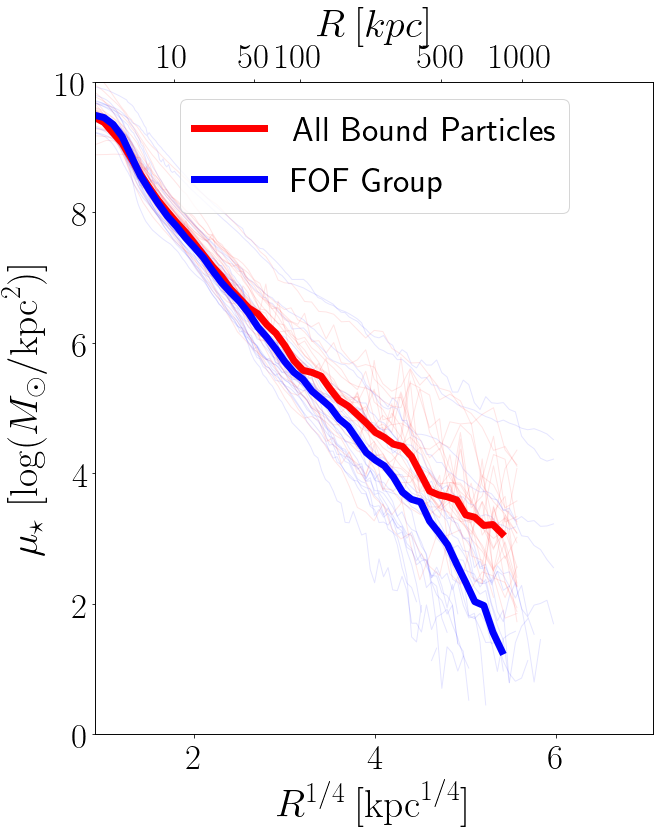

In [142]:
fig = plt.figure(figsize=(10, 12))
ax1 = plt.subplot()
hsc_sma = np.arange(0.4, 5.5, 0.1)
FOF_isos_matched =[]
    
# ax1.plot(hsc_sma, 
#                  np.log10(interp1d(iso['sma_kpc'], iso['intens_kpc'])(hsc_sma**4))+ np.log10(0.7 ** 2.0),
#                  linewidth=2, alpha=0.7, 
#                  label='_nolegend_', linestyle = ':')

for Group_ID, full_particles_iso in zip(Group_IDs[:-1], full_particles_isos):
    if (np.log10(full_particles_iso['intens_kpc'])+ np.log10(0.7 ** 2.0))[0]>8:

        ax1.plot((full_particles_iso['sma_kpc'] ) ** 0.25,
                     np.log10(full_particles_iso['intens_kpc'])+ np.log10(0.7 ** 2.0) , linewidth=1.0, alpha=0.1, 
                         color = 'r', label='_nolegend_')

        FOF_galaxy_index = np.where(FOF_galaxy_IDS==Group_ID)[0][0]
        ax1.plot((tng_FOF_isos[FOF_galaxy_index]['sma_kpc'] ) ** 0.25,
                     np.log10(tng_FOF_isos[FOF_galaxy_index]['intens_kpc'])+ np.log10(0.7 ** 2.0) ,
                     linewidth=1, alpha=0.1, color ='b', label='_nolegend_')
        
        FOF_isos_matched.append(tng_FOF_isos[FOF_galaxy_index])
        
                 #label='tng Galaxy '+
## median profiles for tng
median_mu_full = get_median_profile(full_particles_isos, pixel_scale = 0, r_bins = hsc_sma, quantity = 'intens_kpc')
median_mu_FOF = get_median_profile(FOF_isos_matched, pixel_scale = 0, r_bins = hsc_sma, quantity = 'intens_kpc')

ax1.plot(hsc_sma, median_mu_full+ np.log10(0.7 ** 2.0), linewidth=7.0, alpha=1, c='r',
         label = 'All Particles')
ax1.plot(hsc_sma, median_mu_FOF+ np.log10(0.7 ** 2.0), linewidth=7.0, alpha=1, c='b',
         label='FOF Group')

######################################################################################################################
# plot details
######################################################################################################################
# # X-Y limits
ax1.set_xlim(0.9, 2500**0.25)
ax1.set_ylim(0, 10)

ax1.tick_params(axis='both', which='major', labelsize=35)

ax1.legend(loc= 'upper center', fontsize=35)

#add twin x axis in kpc
x1, x2 = ax1.get_xlim()
ax1_twin = ax1.twiny()
ax1_twin.set_xlim(x1, x2)
ax1_twin.figure.canvas.draw()
ax1_twin.xaxis.set_ticks([10**0.25, 50**0.25, 100**0.25, 500**0.25, 1000**0.25])
ax1_twin.xaxis.set_ticklabels([r'$10$', r'$50$', r'$100$', r'$500$', r'$1000$'])
ax1_twin.tick_params(axis='both', which='major', labelsize=35)
ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=40)


ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot}/\mathrm{kpc}^2)]$', fontsize=40)
ax1.set_xlabel(r'$R^{1/4} \: [\mathrm{kpc}^{1/4}]$', fontsize=40)
#vertical lines for HSC limits
# ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.5, c='k')
# ax1.axvline(6.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.5, c='k')

#grey out psf region
# ax1.axvspan(0, 6**0.25, alpha=0.25, color='grey')

#add simulation stellar particle softening length: 0.71 (TNG), 0.74 (Illustris)
# 3 times the softening lenght will be around 2.15 kpc for both
# ax1.axvline(2.15 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.5)

######################################################################################################################
#adjustments to ticks and space between subplots


#     #add a bit of space between subplots
#     fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/profiles_matched_by_{0}_{1}.pdf'.format(mass_type, sim_name),
#                 dpi=100, format='pdf', bbox_inches='tight')

plt.show()

In [145]:
from astropy.cosmology import Planck13 as cosmo
from astropy import units as u
from __future__ import division

rho_crit = cosmo.critical_density(0.4).to(u.solMass/u.kpc**3).value
R200 = (M200*(3/4) / (np.pi) / (200*rho_crit) ) **(1/3) #in kpc

/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in log10


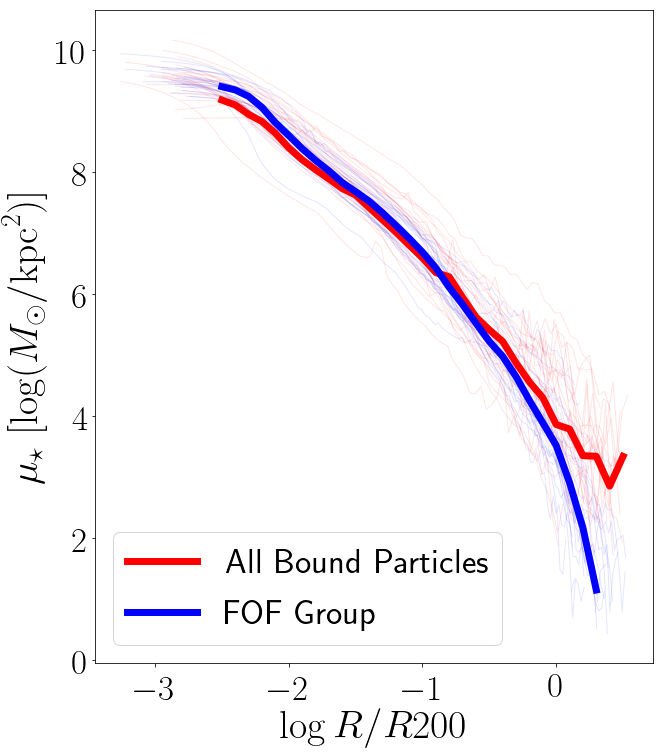

In [158]:
fig = plt.figure(figsize=(10, 12))
ax1 = plt.subplot()
logr200_bins = np.arange(-2.5, 2, 0.1)
r200s_matched=[]
FOF_isos_matched =[]
    
# ax1.plot(hsc_sma, 
#                  np.log10(interp1d(iso['sma_kpc'], iso['intens_kpc'])(hsc_sma**4))+ np.log10(0.7 ** 2.0),
#                  linewidth=2, alpha=0.7, 
#                  label='_nolegend_', linestyle = ':')

for Group_ID, full_particles_iso in zip(Group_IDs[:-1], full_particles_isos):
    if (np.log10(full_particles_iso['intens_kpc'])+ np.log10(0.7 ** 2.0))[0]>8:
        FOF_galaxy_index = np.where(FOF_galaxy_IDS==Group_ID)[0][0]
        r200 = R200[FOF_galaxy_index]

        ax1.plot(np.log10(full_particles_iso['sma_kpc']/r200 ),
                     np.log10(full_particles_iso['intens_kpc'])+ np.log10(0.7 ** 2.0) , linewidth=1.0, alpha=0.1, 
                         color = 'r', label='_nolegend_')

        FOF_galaxy_index = np.where(FOF_galaxy_IDS==Group_ID)[0][0]
        ax1.plot(np.log10(tng_FOF_isos[FOF_galaxy_index]['sma_kpc']/r200 ),
                     np.log10(tng_FOF_isos[FOF_galaxy_index]['intens_kpc'])+ np.log10(0.7 ** 2.0) ,
                     linewidth=1, alpha=0.1, color ='b', label='_nolegend_')
        
        FOF_isos_matched.append(tng_FOF_isos[FOF_galaxy_index])
        r200s_matched.append(r200)
        
                 #label='tng Galaxy '+
## median profiles for tng
median_mu_full = get_median_profile(full_particles_isos, pixel_scale = 1, r_bins = logr200_bins,
                                    quantity = 'intens_kpc', R200=r200s_matched)
median_mu_FOF = get_median_profile(FOF_isos_matched, pixel_scale = 1, r_bins = logr200_bins,
                                   quantity = 'intens_kpc', R200=r200s_matched)

ax1.plot(logr200_bins, median_mu_full+ np.log10(0.7 ** 2.0), linewidth=7.0, alpha=1, c='r',
         label = 'All Particles')
ax1.plot(logr200_bins, median_mu_FOF+ np.log10(0.7 ** 2.0), linewidth=7.0, alpha=1, c='b',
         label='FOF Group')

######################################################################################################################
# plot details
######################################################################################################################
# # X-Y limits
# ax1.set_xlim(0.9, 2500**0.25)
# ax1.set_ylim(0, 10)

ax1.tick_params(axis='both', which='major', labelsize=35)

ax1.legend(loc= 'best', fontsize=35)


ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot}/\mathrm{kpc}^2)]$', fontsize=40)
ax1.set_xlabel(r'$\log {R/R200} $', fontsize=40)
#vertical lines for HSC limits
# ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.5, c='k')
# ax1.axvline(6.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.5, c='k')

#grey out psf region
# ax1.axvspan(0, 6**0.25, alpha=0.25, color='grey')

#add simulation stellar particle softening length: 0.71 (TNG), 0.74 (Illustris)
# 3 times the softening lenght will be around 2.15 kpc for both
# ax1.axvline(2.15 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.5)

######################################################################################################################
#adjustments to ticks and space between subplots


#     #add a bit of space between subplots
#     fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/profiles_matched_by_{0}_{1}.pdf'.format(mass_type, sim_name),
#                 dpi=100, format='pdf', bbox_inches='tight')

plt.show()

TODO : 
- <del>check created stellar maps of particles compared to maps created by Benedikt
- <del>get profiles for central + sats + icl
- <del>figure out why so many galaxies fail
